In [248]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)
from collections import Counter
import math

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 90)

### **[데이터 불러오기]**

In [249]:
train_df = pd.read_csv("C:/Users/hyun/workspace/TIL/ML/5_data_preprocessing/5_HousePrices/house_train.csv")
test_df = pd.read_csv("C:/Users/hyun/workspace/TIL/ML/5_data_preprocessing/5_HousePrices/house_test.csv")

### **[데이터 모판 만들기, y값 분리]**

In [250]:
# 원본 : original_df
original_df = pd.concat([train_df,test_df],sort=False)
original_df = original_df.reset_index(drop=True)
df = original_df.copy(deep=True)

number_of_train_dataset = df.SalePrice.notnull().sum()
number_of_test_dataset = df.SalePrice.isnull().sum()

y = df.pop("SalePrice")[:number_of_train_dataset]

In [251]:
df.tail(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2918,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [252]:
df.set_index("Id", inplace=True)
df.tail(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


### **[결측치 제거]**
- 각 피쳐들의 결측치율을 nan_ratio에 저장

In [253]:
nan_ratio = df.isnull().sum() / len(df)
nan_ratio[nan_ratio > 0].sort_values(ascending=False).head(10)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
FireplaceQu     0.486468
LotFrontage     0.166495
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageYrBlt     0.054471
dtype: float64

- 결측치율이 80%이상인 피쳐 지우자
- PoolQC : 수영장품질. 솔직히 집값에 조금은 영향줄것같은데 99퍼나 비어있어서 아쉽지만 삭제
- MiscFeature : 다른 범주에서 다루지 않는 기타 기능
- Alley : 골목진입방식
- Fence : 울타리품질

In [254]:
df.drop("PoolQC", axis=1, inplace=True)
df.drop("MiscFeature", axis=1, inplace=True)
df.drop("Alley", axis=1, inplace=True)
df.drop("Fence", axis=1, inplace=True)

- numeric과 categorical한 데이터를 따로 분류하여 결측치 채울 예정.
- 일단 남은 결측치 피쳐들 분류해보자(데이터 노트 기재)

In [255]:
df.dtypes.head(10)

MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
LandSlope       object
dtype: object

- 남은 피쳐들 중 value들을 확인해보면서 너무 같은내용만 적혀있으면 있으면 타겟과의 상관성에서도 유의미하지 않을것 같고 그 피쳐 자체의 성질도 못나타낼것 같으니까 삭제

In [256]:
for col_name in df:
    top_value = (Counter(df[col_name]).most_common(1))
    top_value_ratio = round(top_value[0][1]/len(df)*100, 2)
    if top_value_ratio > 80:
        print('[Feature Delete] - [{}] : "{}" : {}%'.format(col_name, top_value[0][0], round(top_value[0][1]/len(df)*100, 2)))
        df.drop(col_name, axis=1, inplace=True)

[Feature Delete] - [Street] : "Pave" : 99.59%
[Feature Delete] - [LandContour] : "Lvl" : 89.83%
[Feature Delete] - [Utilities] : "AllPub" : 99.9%
[Feature Delete] - [LandSlope] : "Gtl" : 95.17%
[Feature Delete] - [Condition1] : "Norm" : 86.02%
[Feature Delete] - [Condition2] : "Norm" : 98.97%
[Feature Delete] - [BldgType] : "1Fam" : 83.08%
[Feature Delete] - [RoofMatl] : "CompShg" : 98.53%
[Feature Delete] - [ExterCond] : "TA" : 86.95%
[Feature Delete] - [BsmtCond] : "TA" : 89.28%
[Feature Delete] - [BsmtFinType2] : "Unf" : 85.41%
[Feature Delete] - [BsmtFinSF2] : "0.0" : 88.08%
[Feature Delete] - [Heating] : "GasA" : 98.46%
[Feature Delete] - [CentralAir] : "Y" : 93.29%
[Feature Delete] - [Electrical] : "SBrkr" : 91.5%
[Feature Delete] - [LowQualFinSF] : "0" : 98.63%
[Feature Delete] - [BsmtHalfBath] : "0.0" : 93.94%
[Feature Delete] - [KitchenAbvGr] : "1" : 95.41%
[Feature Delete] - [Functional] : "Typ" : 93.08%
[Feature Delete] - [GarageQual] : "TA" : 89.21%
[Feature Delete] - [Gara

### **[결측치 채우기]**
- Object타입과 Numeric타입 따로 진행해보자
- 일단 남은 피쳐들을 Numeric과 Object한 애들로 분류(결측치 존재 여부 상관없이)

In [257]:
# numeric타입이지만 categorical한 애들도 일단 object로 변환 후 분류
df['MSSubClass'] = df['MSSubClass'].astype(object)
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype(object)
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype(object)

# 데이트타입들도 일단 object로 뺴놓자
# df['YearBuilt'] = df['YearBuilt'].astype(object)
# df['YearRemodAdd'] = df['YearRemodAdd'].astype(object)
# df['MoSold'] = df['MoSold'].astype(object)
# df['YrSold'] = df['YrSold'].astype(object)

objecttypes = df.select_dtypes("object").columns
numerictypes = df.select_dtypes(["int", "float"]).columns
numerictypes, objecttypes

(Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
        '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
        'HalfBath', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
        'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold'],
       dtype='object'),
 Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
        'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
        'HeatingQC', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'FireplaceQu', 'GarageType', 'GarageFinish'],
       dtype='object'))

#### **[Numeric Type]**
- Numeric먼저 해보자. 최대한 nan값을 채우는쪽으로
- numerictypes_have_nan을 정의해서 numeric타입의 피쳐 중에서 nan값을 갖는 피쳐만 골라서 진행

In [258]:
numerictypes_have_nan = []
for i in range(len(numerictypes)):
    if df[numerictypes[i]].isnull().sum() != 0:
        numerictypes_have_nan.append(numerictypes[i])

# Nan값이 있는 Numeric타입의 피쳐들
print(numerictypes_have_nan)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


- 먼저 LotFrontage부터 채워보자. 우선 nan값 비율 확인
- LotFrontage : 부동산에 연결된 거리의 선형 피트

In [259]:
df['LotFrontage'].isnull().sum() / len(df)

0.16649537512846865

- LotFrontage 채우기 위해서 df에 존재하는 numeric한 피쳐들과 상관계수 확인하여 가장 비슷한 선형관계의 피쳐가 있는지 먼저 확인해보고 싶음

LotFrontage    1.000000
LotArea        0.489896
1stFlrSF       0.458247
GrLivArea      0.382462
GarageArea     0.359786
TotalBsmtSF    0.354822
GarageCars     0.310587
Fireplaces     0.261970
MasVnrArea     0.221079
BsmtFinSF1     0.219408
Name: LotFrontage, dtype: float64

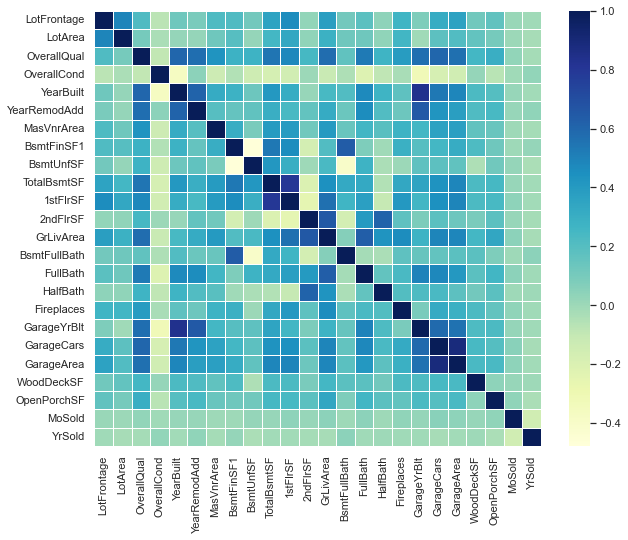

In [260]:
sns.set(rc = {'figure.figsize':(10, 8)})
sns.heatmap(df.corr(), linewidths = 0.8, cmap = "YlGnBu")
df.corr()['LotFrontage'].sort_values(ascending=False)[:10]

- ##### **LotArea가 0.48의 상관계수를 갖고있으나 이후 두 피쳐를 어떻게 처리해야할지, 두 피쳐가 실제로 유사한 성격의 피쳐인지 의구심이 들고, 아래 분포에서도 약간 차이가 있는것 같아 다른 방법으로 결측치 채우도록 수정**

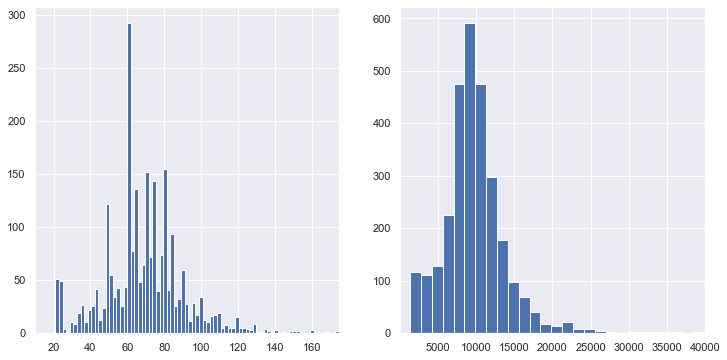

In [261]:
fig = plt.figure()
fig.set_size_inches(12,6)
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
ax_1.hist(df['LotFrontage'], bins=150)
ax_2.hist(df['LotArea'], bins=150)
ax_1.set_xlim(10,175)
ax_2.set_xlim(10,40000)
plt.show()

- 위의 분포를 통해 LotFrontage의 분포가 나름 정규분포인듯 하여 평균 or 최빈값으로 결측치 채워보자

In [262]:
df['LotFrontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: LotFrontage, Length: 128, dtype: int64

In [263]:
print('LotFrontage 최빈값 : ',df['LotFrontage'].mode())
print('LotFrontage 평균 : ',df['LotFrontage'].mean())

LotFrontage 최빈값 :  0    60.0
Name: LotFrontage, dtype: float64
LotFrontage 평균 :  69.30579531442663


- **[의사결정 1]**
<br>일단 평균값으로 채워보고 나중에 최빈값으로도 채워봐서 성능 더 잘나오는걸로 채택하자

In [264]:
LotFrontage_mean = round(df['LotFrontage'].mean(),0)

In [265]:
df["LotFrontage"] = df["LotFrontage"].fillna(LotFrontage_mean)

In [266]:
df["LotFrontage"].isnull().sum()

0

- 나머지 피쳐들 확인해보자
- 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea'

In [267]:
for _ in range(1,len(numerictypes_have_nan)):
    print(numerictypes_have_nan[_], ':', df[numerictypes_have_nan[_]].isnull().sum() / len(df))

MasVnrArea : 0.0078794107571086
BsmtFinSF1 : 0.00034258307639602604
BsmtUnfSF : 0.00034258307639602604
TotalBsmtSF : 0.00034258307639602604
BsmtFullBath : 0.0006851661527920521
GarageYrBlt : 0.05447070914696814
GarageCars : 0.00034258307639602604
GarageArea : 0.00034258307639602604


GarageYrBlt빼고는 nan값 비율이 작으니 얘네 먼저 채워주자

1. MasVnrArea : 석조 베니어판 면적(제곱피트)

In [268]:
df["MasVnrArea"].isnull().sum()

23

In [270]:
df[df["MasVnrArea"].isnull()].head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
235,60,RL,69.0,7851,Reg,Inside,Gilbert,2Story,6,5,2002,2002,Gable,VinylSd,VinylSd,NaN,NaN,Gd,PConc,Gd,No,GLQ,625.0,235.0,860.0,Ex,860,1100,1960,1.0,2,1,4,Gd,8,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,288,48,5,2010
530,20,RL,69.0,32668,IR1,CulDSac,Crawfor,1Story,6,3,1957,1975,Hip,Wd Sdng,Stone,NaN,NaN,Gd,PConc,TA,No,Rec,1219.0,816.0,2035.0,TA,2515,0,2515,1.0,3,0,4,TA,9,2,TA,Attchd,1975.0,RFn,2.0,484.0,0,0,3,2007
651,60,FV,65.0,8125,Reg,Inside,Somerst,2Story,7,6,2007,2007,Gable,CemntBd,CmentBd,NaN,NaN,Gd,PConc,Gd,No,Unf,0.0,813.0,813.0,Ex,822,843,1665,0.0,2,1,3,Gd,7,0,NaN,Attchd,2007.0,RFn,2.0,562.0,0,0,5,2008
937,20,RL,67.0,10083,Reg,Inside,SawyerW,1Story,7,5,2003,2003,Gable,VinylSd,VinylSd,NaN,NaN,Gd,PConc,Gd,No,GLQ,833.0,343.0,1176.0,Ex,1200,0,1200,1.0,2,0,2,Gd,5,0,NaN,Attchd,2003.0,RFn,2.0,555.0,0,41,8,2009
974,20,FV,95.0,11639,Reg,Corner,Somerst,1Story,7,5,2007,2008,Gable,CemntBd,CmentBd,NaN,NaN,Gd,PConc,Gd,No,Unf,0.0,1428.0,1428.0,Ex,1428,0,1428,0.0,2,0,3,Gd,6,0,NaN,Attchd,2007.0,Fin,2.0,480.0,0,120,12,2008


In [274]:
round(df["MasVnrArea"].mean(), 0)

102.0

In [273]:
df["MasVnrArea"].value_counts()

0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: MasVnrArea, Length: 444, dtype: int64

In [275]:
# 비어있음 -> 평균으로 처리
df["MasVnrArea"] = df["MasVnrArea"].fillna(round(df["MasVnrArea"].mean(), 0))

In [277]:
df["MasVnrArea"].isnull().sum()

0

2. BsmtFinSF1 : 유형 1 완성 평방 피트
3. BsmtUnfSF : 지하실의 미완성 평방 피트
4. TotalBsmtSF : 지하 면적의 총 평방 피트
5. BsmtFullBath : 지하 전체 욕실
6. GarageCars : 차고의 차량수용 크기
7. GarageArea : 평방 피트의 차고 크기

In [170]:
# 비어있음 -> 없음으로 처리
df["BsmtFinSF1"] = df["BsmtFinSF1"].fillna(0)
df["BsmtUnfSF"] = df["BsmtUnfSF"].fillna(0)
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0)
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0)
df["GarageCars"] = df["GarageCars"].fillna(0)
df["GarageArea"] = df["GarageArea"].fillna(0)

8. GarageYrBlt : 차고 건설 연도 -> YearBuilt : 원래 건설 날짜 로 채우기

In [171]:
df[["GarageYrBlt","YearBuilt"]]
#df["GarageYrBlt"] = df["GarageYrBlt"].fillna()
# df["GarageYrBlt"].isnull().sum()

,GarageYrBlt,YearBuilt
Id,,
1,2003.0,2003
2,1976.0,1976
3,2001.0,2001
4,1998.0,1915
5,2000.0,2000
...,...,...
2915,NaN,1970
2916,1970.0,1970
2917,1960.0,1960


In [172]:
df['GarageYrBlt'][(df['GarageCars']==0.0) & (df['GarageArea']==0)]

Id
40     NaN
49     NaN
79     NaN
89     NaN
90     NaN
        ..
2894   NaN
2910   NaN
2914   NaN
2915   NaN
2918   NaN
Name: GarageYrBlt, Length: 158, dtype: float64

In [173]:
df['GarageYrBlt'][df['GarageCars']==0.0] = 'None'

In [174]:
df['GarageYrBlt'].isnull().sum()

1

In [175]:
df[df['GarageYrBlt'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2127,60,RM,57.0,8094,Reg,Inside,OldTown,2.5Unf,6,8,1910,1983,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,PConc,TA,Mn,Rec,196.0,1046.0,1242.0,Gd,1242,742,1984,0.0,2,0,5,TA,8,0,NaN,Detchd,NaN,NaN,1.0,360.0,64,0,9,2008


In [176]:
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

In [177]:
df['GarageYrBlt'].isnull().sum()

0

- numeric 피쳐들 nan값들 다 채워졌는지 확인

In [178]:
for _ in range(len(numerictypes_have_nan)):
    print(numerictypes_have_nan[_], ':', df[numerictypes_have_nan[_]].isnull().sum() / len(df))

LotFrontage : 0.0
MasVnrArea : 0.0
BsmtFinSF1 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
BsmtFullBath : 0.0
GarageYrBlt : 0.0
GarageCars : 0.0
GarageArea : 0.0


#### **[Categorical Type]**
- 이제 categorical한 피쳐들 채워보자
- 우선 categorical한 피쳐들 중 nan값 가지고 있는 피쳐들 확인

In [179]:
objecttypes_have_nan = []
for i in range(len(objecttypes)):
    if df[objecttypes[i]].isnull().sum() != 0:
        objecttypes_have_nan.append(objecttypes[i])

print(objecttypes_have_nan)

['MSZoning', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish']


- 그것들 중에서 nan값 비율 확인

In [180]:
for _ in range(len(objecttypes_have_nan)):
    print(objecttypes_have_nan[_], ':', df[objecttypes_have_nan[_]].isnull().sum() / len(df))

MSZoning : 0.0013703323055841042
Exterior1st : 0.00034258307639602604
Exterior2nd : 0.00034258307639602604
MasVnrType : 0.008221993833504625
BsmtQual : 0.02774922918807811
BsmtExposure : 0.028091812264474134
BsmtFinType1 : 0.027064063035286058
KitchenQual : 0.00034258307639602604
FireplaceQu : 0.48646796848235696
GarageType : 0.05378554299417609
GarageFinish : 0.05447070914696814


- MSZoning, Exterior1st, Exterior2nd, MasVnrType : nan값 비율이 매우 작아서 가장 많은 value로 채워주자
- KitchenQual : nan값 1개밖에없음. 얘도 그냥 제일 많은 애로 채우자

- 일단 BsmtQual, BsmtExposure, BsmtFinType1, FireplaceQu, GarageType, GarageFinish 얘네는 나름 nan값이 있으니 나중에 처리하고 나머지 먼저 채우자

In [181]:
# 이렇게 가장 많은 value 각 피쳐마다 확인하여 채워주기
df['MasVnrType'].value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [182]:
# 채우기 완료
df["MSZoning"] = df["MSZoning"].fillna("RL")
df["Exterior1st"] = df["Exterior1st"].fillna("VinylSd")
df["Exterior2nd"] = df["Exterior2nd"].fillna("VinylSd")
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["KitchenQual"] = df["KitchenQual"].fillna("TA")

- 이제 BsmtQual, BsmtExposure, BsmtFinType1, FireplaceQu, GarageType, GarageFinish 얘네들 채우자

#### **[1]. BsmtQual, BsmtExposure, BsmtFinType1에서의 nan값은 지하실이 없는 집으로 추정하여 none으로 채움**
- 세 피쳐간의 nan값을 가진 인덱스끼리 비교해봤더니 거의 모든 행에서 nan값의 위치가 일치했다. 그래서 일괄적으로 인식함
- 세 피쳐 모두 nan값에 None 채워넣음

In [183]:
# 세 피쳐의 nan값을 가진 행의 인덱스들
print(df[df['BsmtQual'].isnull()].index)
print(df[df['BsmtExposure'].isnull()].index)
print(df[df['BsmtFinType1'].isnull()].index)

Int64Index([  18,   40,   91,  103,  157,  183,  260,  343,  363,  372,  393,
             521,  533,  534,  554,  647,  706,  737,  750,  779,  869,  895,
             898,  985, 1001, 1012, 1036, 1046, 1049, 1050, 1091, 1180, 1217,
            1219, 1233, 1322, 1413, 1586, 1594, 1730, 1779, 1815, 1848, 1849,
            1857, 1858, 1859, 1861, 1916, 2051, 2067, 2069, 2121, 2123, 2189,
            2190, 2191, 2194, 2217, 2218, 2219, 2225, 2388, 2436, 2453, 2454,
            2491, 2499, 2548, 2553, 2565, 2579, 2600, 2703, 2764, 2767, 2804,
            2805, 2825, 2892, 2905],
           dtype='int64', name='Id')
Int64Index([  18,   40,   91,  103,  157,  183,  260,  343,  363,  372,  393,
             521,  533,  534,  554,  647,  706,  737,  750,  779,  869,  895,
             898,  949,  985, 1001, 1012, 1036, 1046, 1049, 1050, 1091, 1180,
            1217, 1219, 1233, 1322, 1413, 1488, 1586, 1594, 1730, 1779, 1815,
            1848, 1849, 1857, 1858, 1859, 1861, 1916, 2051, 2067, 20

In [184]:
# 세 피쳐들에 위치한 nan값들 중 세 피쳐모두 같은 인덱스에 위치하는 nan값들의 갯수
print(len(set(df[df['BsmtQual'].isnull()].index) & set(df[df['BsmtExposure'].isnull()].index) & set(df[df['BsmtFinType1'].isnull()].index)))

79


In [185]:
df['BsmtQual'] = df['BsmtQual'].fillna("None")
df['BsmtExposure'] = df['BsmtExposure'].fillna("None")
df['BsmtFinType1'] = df['BsmtFinType1'].fillna("None")

#### **[2]. FireplaceQu**
- FireplaceQu의 Nan값 갯수 : 1420개, 위에서 벽난로 없는 집이 FireplaceQu값이 NaN값을 나타냈으니 이것도 그냥 None처리하자
- Fireplaces == 0 인 애들이 FireplaceQu == NaN

In [186]:
df[(df['Fireplaces']==0) &(df['FireplaceQu'].isnull())][['Fireplaces','FireplaceQu']]

,Fireplaces,FireplaceQu
Id,,
1,0,NaN
6,0,NaN
11,0,NaN
13,0,NaN
16,0,NaN
...,...,...
2913,0,NaN
2914,0,NaN
2915,0,NaN


In [187]:
df["FireplaceQu"].value_counts()

Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64

In [188]:
df["FireplaceQu"] = df["FireplaceQu"].fillna('None')

#### **[3]. GarageType, GarageFinish**
- 얘네도 마찬가지. 두 피쳐의 nan값 존재위치 확인해보니 같은 위치에 존재하여, 차고가 없는것으로 판단

In [189]:
# df[(df['GarageType'].isnull()) &(df['GarageFinish'].isnull())][['GarageType','GarageFinish','GarageYrBlt']]

In [190]:
df['GarageFinish'].isnull().sum(), df['GarageType'].isnull().sum()

(159, 157)

In [191]:
df[['GarageFinish', 'GarageType']][df['GarageType'].isnull()]

,GarageFinish,GarageType
Id,,
40,NaN,NaN
49,NaN,NaN
79,NaN,NaN
89,NaN,NaN
90,NaN,NaN
...,...,...
2894,NaN,NaN
2910,NaN,NaN
2914,NaN,NaN


In [192]:
df['GarageType'][df['GarageArea']==0] = 'None'

In [193]:
df['GarageType'].isnull().sum()

0

In [194]:
df[['GarageFinish', 'GarageType']][df['GarageFinish'].isnull()]

,GarageFinish,GarageType
Id,,
40,NaN,None
49,NaN,None
79,NaN,None
89,NaN,None
90,NaN,None
...,...,...
2894,NaN,None
2910,NaN,None
2914,NaN,None


In [195]:
df['GarageFinish'][df['GarageArea']==0] = 'NA'

In [196]:
df['GarageFinish'].isnull().sum()

1

In [197]:
df[df['GarageFinish'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2127,60,RM,57.0,8094,Reg,Inside,OldTown,2.5Unf,6,8,1910,1983,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,PConc,TA,Mn,Rec,196.0,1046.0,1242.0,Gd,1242,742,1984,0.0,2,0,5,TA,8,0,None,Detchd,1910,NaN,1.0,360.0,64,0,9,2008


In [198]:
df[['GarageYrBlt' ,'GarageFinish']][df['GarageYrBlt']==1910]

,GarageYrBlt,GarageFinish
Id,,
247,1910.0,Unf
741,1910.0,Unf
810,1910.0,Unf
1560,1910.0,Unf
2088,1910.0,Unf
2127,1910,NaN
2128,1910.0,Unf
2219,1910.0,Unf
2474,1910.0,Unf


In [199]:
df['GarageFinish'].fillna('Unf', inplace=True)

In [200]:
df['GarageFinish'].isnull().sum()

0

In [201]:
# GarageType의 nan값 갯수와 두 피쳐간의 같은위치에 있는 nan값 갯수가 같음.
print(df["GarageType"].isnull().sum())
print(len(set(df[df['GarageType'].isnull()].index) & set(df[df['GarageFinish'].isnull()].index)))

0
0


In [202]:
# # 따라서 두 피쳐 모두 None으로 채워줌
# df["GarageType"] = df["GarageType"].fillna('None')
# df["GarageFinish"] = df["GarageFinish"].fillna('None')

- + 데이트타입 피쳐들은 데이트타입으로 바꿔주자

## **[인코딩]**
- object타입들만 골라내서 진행

In [203]:
objecttypes = df.select_dtypes("object").columns
objecttypes

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish'],
      dtype='object')

- 그리고 datetime성질의 피쳐들 전처리해주고 싶은데(아직 못함)

In [204]:
# df['Sold'] = df['YrSold'].astype(str) + "-" + df['MoSold'].astype(str) + '-00'


# df['Sold'] = pd.to_datetime(df['Sold'], format='%Y-%m-%d')
# df.head(5)

#### **[Label-encoding]**
- 순위형 변수인 것 같은 피쳐들만 따로 빼서 labelencoding 실행
- ExterQual : 외장재 품질
- BsmtQual : 지하실 높이
- HeatingQC :난방 품질
- KitchenQual : 주방 품질
- FireplaceQu : 벽난로 품질

- labelencoding할 피쳐들의 value들이 같은 양식으로 작성되있는 모습 확인

In [205]:
column_for_labelencoding = ['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu']
for i in range(len(column_for_labelencoding)):    
    print('{} : {}'.format(column_for_labelencoding[i], df[column_for_labelencoding[i]].unique()))

ExterQual : ['Gd' 'TA' 'Ex' 'Fa']
BsmtQual : ['Gd' 'TA' 'Ex' 'None' 'Fa']
HeatingQC : ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual : ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu : ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


- 우선 FireplaceQu행만 labelencoding 실행

In [206]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [207]:
le.fit(df['FireplaceQu'].values)

LabelEncoder()

In [208]:
# le될 values
le.classes_

array(['Ex', 'Fa', 'Gd', 'None', 'Po', 'TA'], dtype=object)

In [209]:
# le된 values(아직 할당x)
le.transform(df['FireplaceQu'].values)

array([3, 5, 5, ..., 5, 3, 5])

- le 잘 되는것 같으니 le해야할 대상들 모두에게 인코딩, 할당 진행

In [210]:
for i in range(len(column_for_labelencoding)):
    df[column_for_labelencoding[i]] = le.transform(df[column_for_labelencoding[i]].values)

df[['ExterQual', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu']]

,ExterQual,BsmtQual,HeatingQC,KitchenQual,FireplaceQu
Id,,,,,
1,2,2,0,2,3
2,5,2,0,5,5
3,2,2,0,2,5
4,5,5,2,2,2
5,2,2,0,2,5
...,...,...,...,...,...
2915,5,5,2,5,3
2916,5,5,5,5,3
2917,5,5,0,5,5


- 그러고나서 인코딩 끝난 피쳐는 다시 numerictype으로 분류(단순히 인코딩 대상에서 제외하기 위해)

In [211]:
df['ExterQual'] = df['ExterQual'].astype(int)
df['BsmtQual'] = df['BsmtQual'].astype(int)
df['HeatingQC'] = df['HeatingQC'].astype(int)
df['KitchenQual'] = df['KitchenQual'].astype(int)
df['FireplaceQu'] = df['FireplaceQu'].astype(int)

objecttypes = df.select_dtypes("object").columns
numerictypes = df.select_dtypes(["int", "float"]).columns
numerictypes, objecttypes

(Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinSF1',
        'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
        'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual',
        'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'WoodDeckSF',
        'OpenPorchSF', 'MoSold', 'YrSold'],
       dtype='object'),
 Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
        'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BedroomAbvGr',
        'TotRmsAbvGrd', 'GarageType', 'GarageYrBlt', 'GarageFinish'],
       dtype='object'))

#### **[One-Hot Encoding]**
- objecttypes들 중 분류되어야 할 것들만 지정해서 one-hot encoding 진행하자

In [213]:
# df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)
# df

- 원핫인코딩 완성

In [214]:
#have_to_onehot = ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
#                             'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#                              'Foundation', 'BsmtExposure', 'BsmtFinType1', 'GarageType', 'GarageFinish']
#onehot_df = pd.get_dummies(df[['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
#                              'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#                              'Foundation', 'BsmtExposure', 'BsmtFinType1', 'GarageType', 'GarageFinish']])
onehot_df = pd.get_dummies(df)
onehot_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,FireplaceQu,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),...,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_2207.0,GarageYrBlt_None,GarageFinish_Fin,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,2,2,706.0,150.0,856.0,0,856,854,1710,1.0,2,1,2,0,3,2.0,548.0,0,61,2,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,5,2,978.0,284.0,1262.0,0,1262,0,1262,0.0,2,0,5,1,5,2.0,460.0,298,0,5,2007,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,2,2,486.0,434.0,920.0,0,920,866,1786,1.0,2,1,2,1,5,2.0,608.0,0,42,9,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,5,5,216.0,540.0,756.0,2,961,756,1717,1.0,1,0,2,1,2,3.0,642.0,0,35,2,2006,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,84.0,14260,8,5,2000,2000,350.0,2,2,655.0,490.0,1145.0,0,1145,1053,2198,1.0,2,1,2,1,5,3.0,836.0,192,84,12,2008,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,7,1970,1970,0.0,5,5,0.0,546.0,546.0,2,546,546,1092,0.0,1,1,5,0,3,0.0,0.0,0,0,6,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2916,21.0,1894,4,5,1970,1970,0.0,5,5,252.0,294.0,546.0,5,546,546,1092,0.0,1,1,5,0,3,1.0,286.0,0,24,4,2006,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2917,160.0,20000,5,7,1960,1996,0.0,5,5,1224.0,0.0,1224.0,0,1224,0,1224,1.0,1,0,5,1,5,2.0,576.0,474,0,9,2006,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### **[Log Transformation]**
- 로그 취해줄 대상 : 왜도값이 1이상

In [215]:
from scipy.stats import skew
skewness = onehot_df[numerictypes].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

high_skewness = skewness[abs(skewness) > 1] # 왜도 값이 1 이상인 column만 채택
skew_columns = high_skewness.index
print(high_skewness)
print(skew_columns)

LotArea        12.822431
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
LotFrontage     1.645574
1stFlrSF        1.469604
BsmtFinSF1      1.425230
GrLivArea       1.269358
TotalBsmtSF     1.156894
dtype: float64
Index(['LotArea', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage',
       '1stFlrSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF'],
      dtype='object')


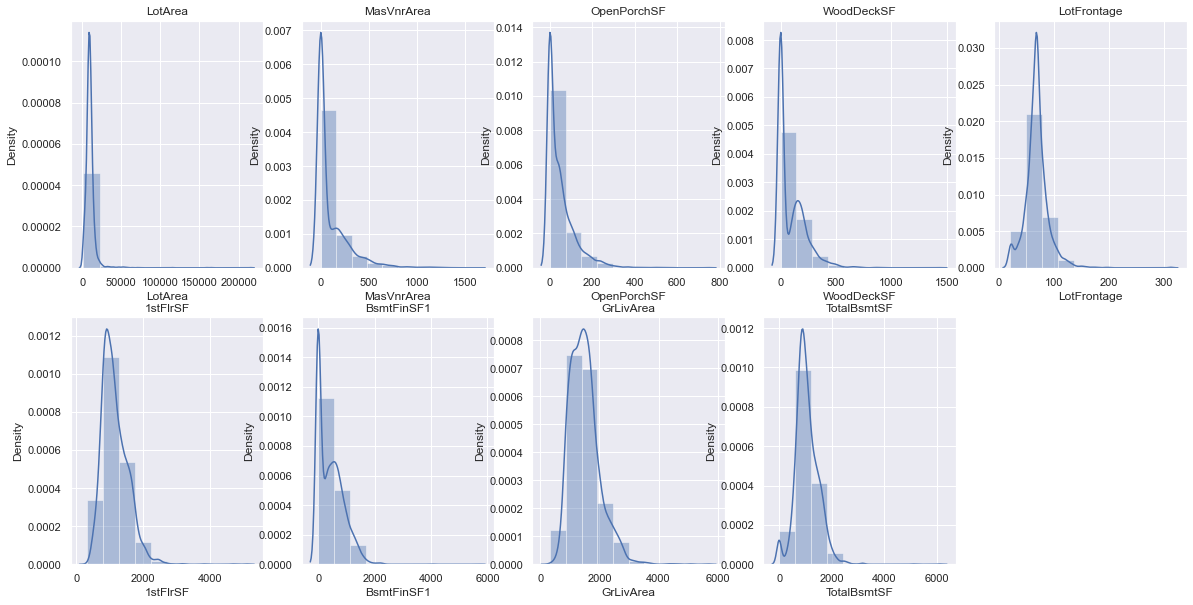

In [216]:
fig = plt.figure()
fig.set_size_inches(20, 10)

ax = []
for i, col_name in enumerate(skew_columns):
    ax.append(fig.add_subplot(2,5, i+1))
    x = onehot_df[col_name]
    
    ax[i] = sns.distplot(x, bins = 10)
    ax[i].set_title(col_name)


In [217]:
onehot_df[skew_columns] = np.log1p(onehot_df[skew_columns]+0.5)
log_onehot_df = onehot_df.copy()

- Log Transformation이 완료된 모습

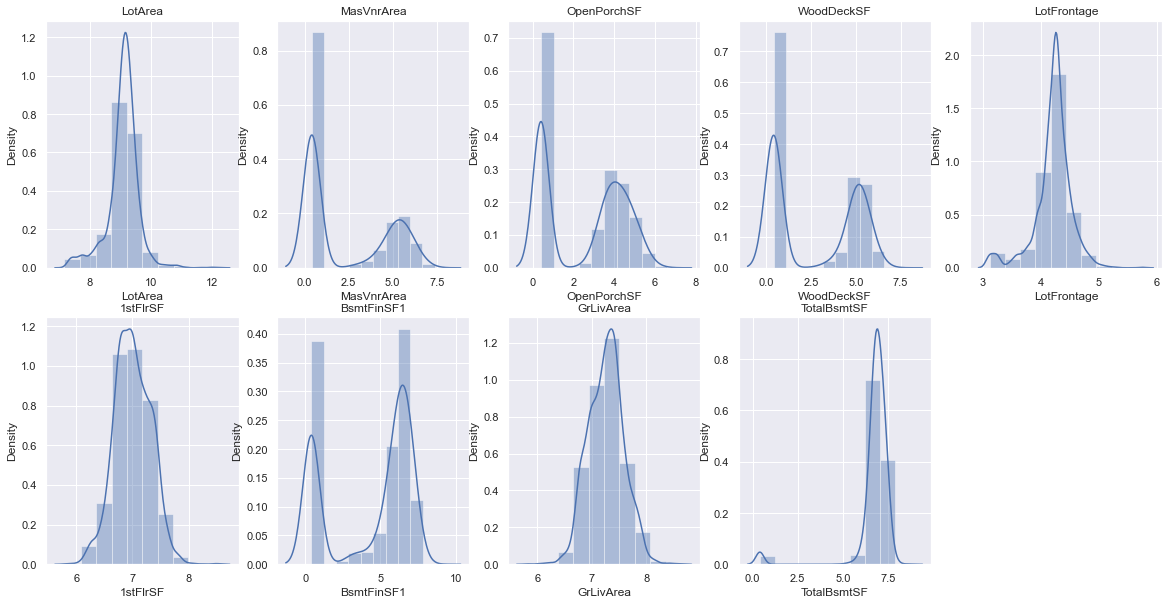

In [218]:
fig = plt.figure()
fig.set_size_inches(20, 10)

ax = []
for i, col_name in enumerate(skew_columns):
    ax.append(fig.add_subplot(2,5, i+1))
    x = log_onehot_df[col_name]
    
    ax[i] = sns.distplot(x, bins = 10)
    ax[i].set_title(col_name)

- 이제 다 끝났으니 상관계수 큰 순서대로 잘라보자

In [219]:
log_onehot_df.isnull().sum().sum()

0

<AxesSubplot:>

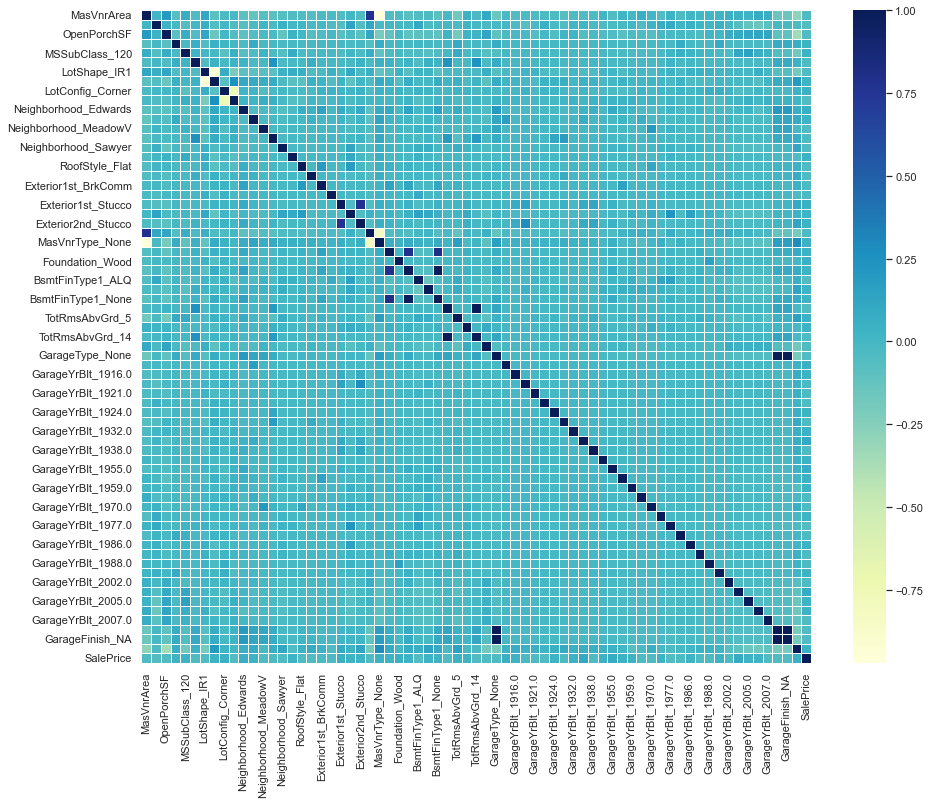

In [220]:
temp_df = pd.merge(log_onehot_df, y, left_index = True, right_index = True)
temp_df = temp_df.corr()
temp_columns = temp_df[(temp_df["SalePrice"] >= 0.03) | (temp_df["SalePrice"] <= -0.03)].T.columns
temp_columns = temp_columns.tolist()[:-1]

temp_df = pd.merge(log_onehot_df[temp_columns], y, left_index = True, right_index = True)

sns.set(rc = {'figure.figsize':(15, 12)})
sns.heatmap(temp_df.corr(), linewidths = 0.8, cmap = "YlGnBu")

### [Model 만들기]

- 일단 타겟 피쳐 빼주고

In [221]:
del temp_df['SalePrice']

- X_train, X_test, y_train 확인

In [222]:
final_df  = log_onehot_df[temp_df.columns]
final_y = y.copy()

In [223]:
final_df

,MasVnrArea,FireplaceQu,OpenPorchSF,MSSubClass_45,MSSubClass_120,MSZoning_RH,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_Edwards,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gambrel,Exterior1st_BrkComm,Exterior1st_Stone,Exterior1st_Stucco,Exterior2nd_Plywood,Exterior2nd_Stucco,MasVnrType_BrkFace,MasVnrType_None,Foundation_Slab,Foundation_Wood,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_None,BedroomAbvGr_8,TotRmsAbvGrd_5,TotRmsAbvGrd_12,TotRmsAbvGrd_14,GarageType_BuiltIn,GarageType_None,GarageYrBlt_1906.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1921.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1932.0,GarageYrBlt_1935.0,GarageYrBlt_1938.0,GarageYrBlt_1942.0,GarageYrBlt_1955.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1964.0,GarageYrBlt_1970.0,GarageYrBlt_1975.0,GarageYrBlt_1977.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1991.0,GarageYrBlt_2002.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0,GarageYrBlt_2007.0,GarageYrBlt_None,GarageFinish_NA,GarageFinish_Unf
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,5.285739,3,4.135167,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.405465,5,0.405465,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5.096813,5,3.772761,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.405465,2,3.597312,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,5.862210,5,4.448516,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.405465,3,0.405465,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2916,0.405465,3,3.238678,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2917,0.405465,5,0.405465,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [224]:
final_y = final_y.values.reshape(-1,1)

In [225]:
print(final_df.shape)
print(final_y.shape)

(2919, 68)
(1460, 1)


[데이터 스케일링]

In [226]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler().fit(final_df)
final_scaled_data = minmax_scale.transform(final_df)

final_scaled_data[:1]

array([[0.6998583 , 0.6       , 0.60099248, 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [227]:
final_train = final_scaled_data[:number_of_train_dataset]
final_test = final_scaled_data[number_of_train_dataset:]
print(final_train.shape)
print(final_test.shape)

(1460, 68)
(1459, 68)


[Train, Test split]

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(final_train, final_y, test_size=.25, random_state=42)

In [229]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 선언
linear_model = LinearRegression()

# 모델 학습
linear_model.fit(X_train, y_train)

LinearRegression()

In [230]:
# 집값 예측(검증용 데이터)
y_val_pred = linear_model.predict(X_val)
y_val_pred[:5]

array([[158428.97398189],
       [228041.99558191],
       [128480.66206572],
       [159705.0152851 ],
       [236919.47013909]])

In [231]:
y_pred = linear_model.predict(final_test)
y_pred # 예측 결과

array([[113301.050184  ],
       [141064.63247468],
       [201488.81618599],
       ...,
       [124324.1973785 ],
       [132504.28675799],
       [197713.72190642]])

In [232]:
submission = pd.read_csv('C:/Users/hyun/workspace/TIL/ML/5_data_preprocessing/5_HousePrices/submission.csv')
submission['SalePrice'] = y_pred.astype(int)
submission.dtypes

Unnamed: 0    int64
Id            int64
SalePrice     int32
dtype: object

In [233]:
submission.to_csv('C:/Users/hyun/workspace/TIL/ML/5_data_preprocessing/5_HousePrices/submission.csv')

In [234]:
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestClassifier

# select = RFE(RandomForestClassifier(n_estimators = 100))
# select.fit(X_train, y_train)

# # transform training set
# X_train_selected = select.transform(X_train)
# X_train_selected.shape

In [235]:
# # 살아남은 feature이름들
# final_df.columns[select.get_support()]

In [236]:
# # X_train의 값을 input으로 할 모델을 만들어줌

# # 걸리지지않은 y와 걸러진 y둘의 성능을 비교해보자
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(
#     n_estimators = 100, max_depth = 20, random_state = 0)

In [237]:
# # feature가 제거된 후 X_train_selcected값으로 fitting
# clf.fit(X_train_selected, y_train)

# # feature가 제거된 후 X_test값으로 prediction
# idx = (final_df[number_of_train_dataset:].index+1).tolist()
# y_pred_elim = clf.predict(select.transform(X_test))
# y_pred_elim

In [238]:
# regr.predict(final_x_train[0].reshape(1, -1))

In [239]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [240]:
# y_true = y_test
# y_hat = regr.predict(X_test)

# r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

In [241]:
# y_true = y_train
# y_hat = regr.predict(X_train)

# r2_score(y_true, y_hat), mean_absolute_error(y_true, y_hat), mean_squared_error(y_true, y_hat)

- 캐글에 제출할 형식으로 추출

In [242]:
# submission_columns = ["Id", "SalePrice"]

# # feature 제거 후
# submission_df = pd.DataFrame([idx, y_pred_elim]).T
# submission_df.columns = submission_columns
# for col_name in submission_columns:
#     submission_df[col_name] = submission_df[col_name].astype(int)
# submission_df.to_csv("submission_elim.csv", index = False)